In [6]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import tflite_runtime.interpreter as tflite


In [7]:
data = DataLoader.from_folder('./mitrdataset/')


2021-11-20 16:47:42.264268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-20 16:47:42.264313: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-20 16:47:42.264346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aadiljamal1): /proc/driver/nvidia/version does not exist


INFO:tensorflow:Load image with size: 594, num_label: 5, labels: cat0, cat1, cat2, cat3, cat4.


In [8]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

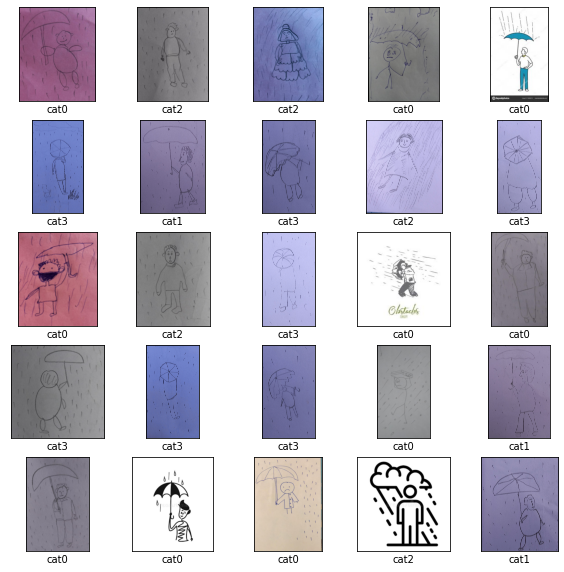

In [9]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [33]:
model = image_classifier.create(train_data, model_spec='resnet_50', validation_data=test_data, epochs=5)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 2048)             23564800  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________
None
Epoch 1/5


/home/aadil_jamal/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


14/14 [==============================] - 176s 12s/step - loss: 1.4696 - accuracy: 0.4821 - val_loss: 1.0821 - val_accuracy: 0.7188
Epoch 2/5
14/14 [==============================] - 167s 12s/step - loss: 1.1906 - accuracy: 0.6853 - val_loss: 0.8500 - val_accuracy: 0.7500
Epoch 3/5
14/14 [==============================] - 173s 13s/step - loss: 0.9363 - accuracy: 0.7701 - val_loss: 0.8059 - val_accuracy: 0.8438
Epoch 4/5
14/14 [==============================] - 165s 12s/step - loss: 0.7927 - accuracy: 0.8170 - val_loss: 0.8542 - val_accuracy: 0.7812
Epoch 5/5
14/14 [==============================] - 157s 11s/step - loss: 0.7498 - accuracy: 0.8571 - val_loss: 0.7843 - val_accuracy: 0.8438


In [35]:
%reload_ext tensorboard



In [36]:
loss, accuracy = model.evaluate(test_data)
    

2/2 [==============================] - 49s 6s/step - loss: 0.8969 - accuracy: 0.7667


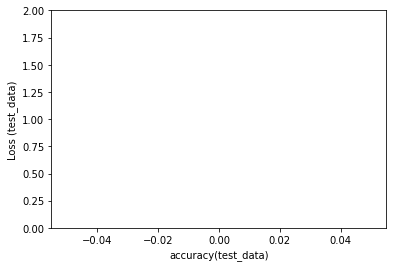

In [46]:
plt.figure()
plt.ylabel("Loss (test_data)")
plt.xlabel("accuracy(test_data)")
plt.ylim([0,2])
plt.plot(loss)
plt.plot(accuracy)

In [38]:
model.export(export_dir='./modelpoints/')


INFO:tensorflow:Assets written to: /tmp/tmpp5t6kfg_/assets


INFO:tensorflow:Assets written to: /tmp/tmpp5t6kfg_/assets
2021-11-20 22:50:07.776059: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-20 22:50:07.776118: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-11-20 22:50:07.785137: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpp5t6kfg_
2021-11-20 22:50:07.819726: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2021-11-20 22:50:07.819779: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpp5t6kfg_
2021-11-20 22:50:07.970417: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-20 22:50:09.386334: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmpp5t6kfg_
2021-11-20 22:50:09.773537: I tensorflow/cc/saved_model/loader.cc:283] SavedModel

INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmptz9r9svj/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmptz9r9svj/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./modelpoints/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./modelpoints/model.tflite


In [39]:
model.export(export_dir='./modelpoints/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./modelpoints/labels.txt


INFO:tensorflow:Saving labels in ./modelpoints/labels.txt


In [40]:
model.evaluate_tflite('./modelpoints/model.tflite', test_data)

{'accuracy': 0.7666666666666667}

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 2048)             23564800  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [49]:
%tensorboard --logdir ./model


Reusing TensorBoard on port 6011 (pid 17613), started 0:00:26 ago. (Use '!kill 17613' to kill it.)

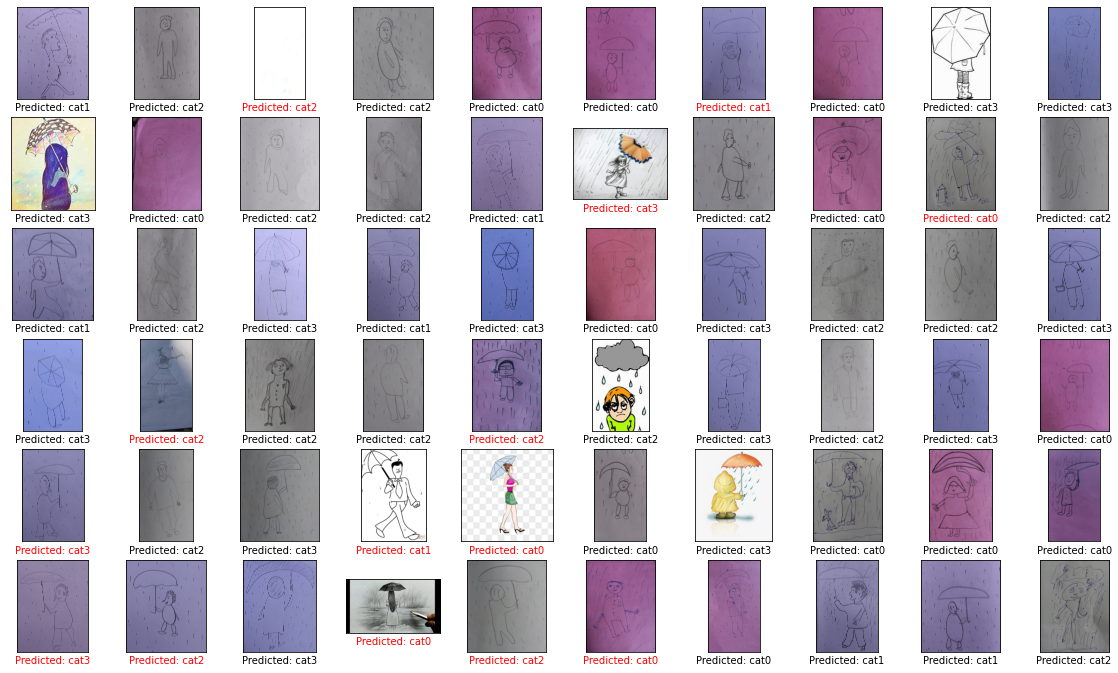

In [43]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()